# **PRÁCTICA 4:  Deep Learning - Parte 1: RNN**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos


# Prelaboratorio



Corre el código y entiéndelo

# Laboratorio

Vamos a hacer predicción del valor de un activo financiero de una empresa a partir del valor de los días anteriores.

In [ ]:
# Importamos librerías
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM
import numpy as np

## Database
Los datos se pueden descargar de aquí (aunque están en el aula virtual)

https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

## Veamos los datos


In [ ]:
# Usamos Pandas para leerlos y mirarlos un poco

import pandas as pd
dataset = pd.read_csv("googl.us.txt", delimiter=",")


In [ ]:
# El dataset tiene 5 características por dia
dataset

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0
...,...,...,...,...,...,...,...
3328,2017-11-06,1049.100,1052.59,1042.000,1042.680,913954,0
3329,2017-11-07,1049.650,1053.41,1043.000,1052.390,1303832,0
3330,2017-11-08,1050.050,1062.69,1047.050,1058.290,1214469,0
3331,2017-11-09,1048.000,1050.88,1035.850,1047.720,1793994,0


In [ ]:
# Valores de apertura de cada día
dataset['Open']

0         50.000
1         50.505
2         55.375
3         55.620
4         52.480
          ...   
3328    1049.100
3329    1049.650
3330    1050.050
3331    1048.000
3332    1043.870
Name: Open, Length: 3333, dtype: float64

In [ ]:
aa = dataset['Open']
aa.shape

(3333,)

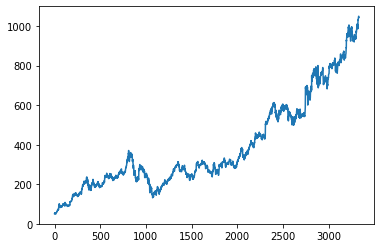

In [ ]:
# Visualizamos los valores de apertura
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(aa)

<Figure size 432x288 with 0 Axes>

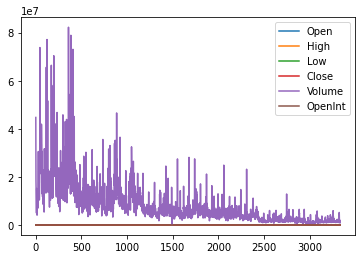

In [ ]:
# Podemos visualizar las 5 características a la vez
%matplotlib inline
plt.figure()
dataset.plot()

In [ ]:
# Cogemos los datos de apertura y de cierre
googl_op = dataset['Open']
googl_cl = dataset['Close']

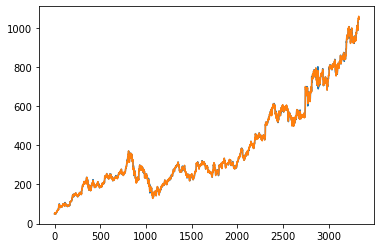

In [ ]:
# Los datos de apertura y de cierre son muy parecidos
%matplotlib inline
plt.figure()
plt.plot(googl_op)
plt.plot(googl_cl)

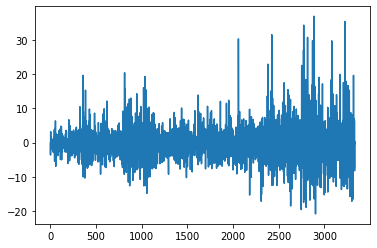

In [ ]:
# Estas son las diferencias entre apertura y cierre
%matplotlib inline
plt.figure()
plt.plot(googl_op-googl_cl)

In [ ]:
# Nos quedamos con los valores de apertura de 10 días como entrada (x), y con el valor de cierre de último día como salida (y)
import numpy as np
xx = googl_op.values[np.arange(0,2000,1)]
yy = googl_cl.values[np.arange(0,2000,1)]
                     
X_train = np.reshape(xx,(200,10,1))
y_train = yy[np.arange(9,2000,10)]
                     
xx = googl_op.values[np.arange(2000,3000,1)]
yy = googl_cl.values[np.arange(2000,3000,1)]
X_test = np.reshape(xx,(100,10,1))
y_test = yy[np.arange(9,1000,10)]

In [ ]:
X_train.shape

(200, 10, 1)

In [ ]:
y_train.shape

(200,)

## MODELO

Definimos un modelo de red neuronal

In [ ]:
# Date cuenta que:
# - Las capas recurrentes tienen la opción "return_sequences" que por defecto está a False.
# - Podemos mezclar capas convolucionales y recurrentes

model = Sequential()

model.add(LSTM(10, input_shape=(10,1)))
#model.add(Conv1D(10, 3,input_shape=(10,1)))
#model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
7/7 [==============================] - 6s 6ms/step - loss: 229.8112
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 229.7678
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 229.7096
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 229.5719
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 229.3151
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 229.1078
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 229.0435
Epoch 8/10
7/7 [==============================] - 0s 5ms/step - loss: 229.0187
Epoch 9/10
7/7 [==============================] - 0s 6ms/step - loss: 229.0011
Epoch 10/10
7/7 [==============================] - 0s 6ms/step - loss: 228.9853


In [ ]:

# EVALUACION
score = model.evaluate(X_test, y_test, batch_size=128)

score

1/1 [==============================] - 1s 685ms/step - loss: 550.8283


550.8283081054688

In [ ]:
# Predecir
y_hat = model.predict(X_test)

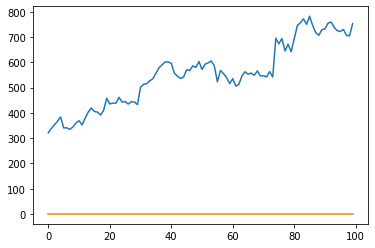

In [ ]:
%matplotlib inline
plt.figure()
plt.plot(y_test)
plt.plot(y_hat)

# Ejercicios

1) Crea, entrena y prueba un modelo con varias capas recurrentes. Da el valor de mae en entrenamiento y test. 


2) Crea, entrena y prueba un modelo que mezcle capas convolucionales y recurrentes. Da el valor de mae en entrenamiento y test. 

3) Crea, entrena y prueba un modelo que mezcle capas convolucionales y recurrentes y que no utilize capas densas. Da el valor de mae en entrenamiento y test. 